Using TFLite model-maker for the Megha project, because exporting custom model was met with technical hiccups.

In [ ]:
!pip install tflite-model-maker

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
# Import Numpy & Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import TFLite model maker related classes
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

In [ ]:
!gdown --id 1bgv3m6m-5Ajj7M7I93zapY0K0vXS4sf2
!unzip final.zip -d dataset
!ls

In [ ]:
image_path = "/content/dataset/final"

# Load all data from the image path
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 2543, num_label: 11, labels: Ac, As, Cb, Cc, Ci, Cs, Ct, Cu, Ns, Sc, St.


In [ ]:
# Split 80% of the data into train_data
train_data, rest_data = data.split(0.8)

# Then split the rest of data into 50% each for validation & test
validation_data, test_data = rest_data.split(0.5)

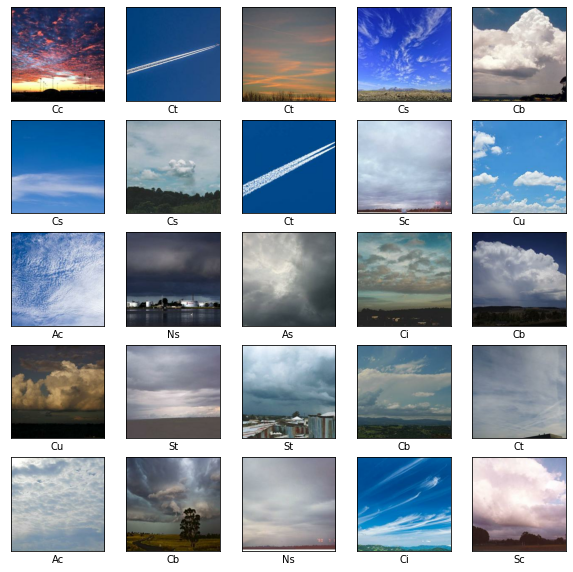

In [ ]:
# Let's take a look at a few of the icon images
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
del model
model = image_classifier.create(
    train_data, 
    model_spec=model_spec.get('mobilenet_v2'), 
    validation_data=validation_data, 
    epochs = 22,
    use_augmentation=True,
    shuffle=True,
    train_whole_model=True,
    dropout_rate=0.4,
    batch_size=64
  )

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_11 (Hub (None, 1280)              2257984   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                14091     
Total params: 2,272,075
Trainable params: 2,237,963
Non-trainable params: 34,112
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/22
31/31 [==============================] - 19s 460ms/step - loss: 2.5335 - accuracy: 0.2011 - val_loss: 3.9082 - val_accuracy: 0.1406
Epoch 2/22
31/31 [==============================] - 14s 442ms/step - loss: 2.1914 - accuracy: 0.3140 - val_loss: 3.6410 - val_accuracy: 0.1719
Epoch 3/22
31/31 [==============================] - 14s 457ms/step - loss: 2.0549 - accuracy: 0.3584 - val_loss: 2.6269 - val_accuracy: 0.2969
Epoch 4/22
31/31 [==============================] - 14s 448ms/step - loss: 1.9874 - accuracy: 0.3901 - val_loss: 2.2862 - val_accuracy: 0.3542
Epoch 5/22
31/31 [==============================] - 14s 449ms/step - loss: 1.9541 - accuracy: 0.3992 - val_loss: 2.2733 - val_accuracy: 0.3490
Epoch 6/22
31/31 [==============================] - 14s 447ms/step - loss: 1.9118 - accuracy: 0.4204 - val_loss: 2.0787 - val_accuracy: 0.4062
Epoch 7/22
31/31 [==============================] - 14s 449ms/step - loss: 1.8460 - accuracy: 0.4531 - val_loss: 2.2402 - val_accuracy: 0.4167

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_10 (Hub (None, 1280)              2257984   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 11)                14091     
Total params: 2,272,075
Trainable params: 2,237,963
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


8/8 [==============================] - 1s 73ms/step - loss: 1.9086 - accuracy: 0.4824


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


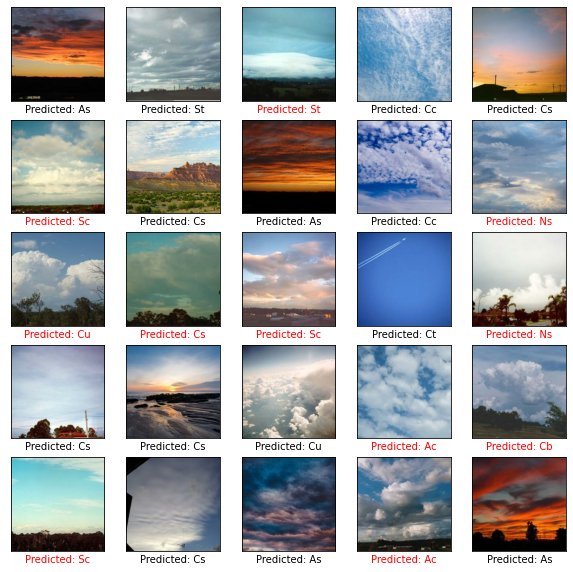

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 25 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(10, 10))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
# Create tflite model and labels file 
model.export(export_dir='./model-files/', 
             tflite_filename='megha_model.tflite')
model.export(export_dir='./model-files/', 
             export_format=ExportFormat.LABEL)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmp3debex4q/assets


INFO:tensorflow:Assets written to: /tmp/tmp3debex4q/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpg8cls70b/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpg8cls70b/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model-files/megha_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model-files/megha_model.tflite


INFO:tensorflow:Saving labels in ./model-files/labels.txt


INFO:tensorflow:Saving labels in ./model-files/labels.txt


In [ ]:
!cd model-files && ls

labels.txt  megha_model.tflite


In [ ]:
# Download model tflite & labels file
from google.colab import files

files.download('./model-files/megha_model.tflite')
files.download('./model-files/labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>